# Day 29 – Text Preprocessing for Ticket Classification
### Clean, Normalize, and Tokenize Customer Support Text

Today you will take raw, messy chat/ticket text and convert it into clean, machine-readable tokens.
This is the foundation for classification models built in upcoming days (TF-IDF, embeddings, etc).

#### Goals:
- Understand real-world text cleaning steps
- Tokenize text using spaCy
- Remove stopwords, links, emails, numbers, punctuation
- Lemmatize tokens for ML readiness
- Generate token frequency visualization
- Create a final cleaned text column for ML models

In [2]:
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('seaborn-v0_8-whitegrid')

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")
print('spaCy model loaded')

spaCy model loaded


## 1. Create Synthetic Ticket Dataset

In [3]:
data = {
    "ticket_id": [101, 102, 103, 104, 105],
    "message": [
        "Hi, my payment didn't go through. I got charged twice!! Please fix asap.",
        "The app keeps crashing when I try to upload a file. Error code: 502.",
        "URGENT: I cannot login to my dashboard. Reset link not working.",
        "Hey team, I need to update my billing email. How can I do that?",
        "There's a bug in the latest update. The screen freezes randomly."
    ]
}

df = pd.DataFrame(data)
df

,ticket_id,message
0,101,"Hi, my payment didn't go through. I got charge..."
1,102,The app keeps crashing when I try to upload a ...
2,103,URGENT: I cannot login to my dashboard. Reset ...
3,104,"Hey team, I need to update my billing email. H..."
4,105,There's a bug in the latest update. The screen...


## 2. Basic Cleaning Function

In [4]:
def basic_clean(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)            # remove URLs
    text = re.sub(r"\S+@\S+", "", text)            # remove emails
    text = re.sub(r"[^a-zA-Z ]", "", text)          # keep only letters
    text = re.sub(r"\s+", " ", text).strip()       # remove extra spaces
    return text

df['clean_text'] = df['message'].apply(basic_clean)
df[['ticket_id','message','clean_text']]

,ticket_id,message,clean_text
0,101,"Hi, my payment didn't go through. I got charge...",hi my payment didnt go through i got charged t...
1,102,The app keeps crashing when I try to upload a ...,the app keeps crashing when i try to upload a ...
2,103,URGENT: I cannot login to my dashboard. Reset ...,urgent i cannot login to my dashboard reset li...
3,104,"Hey team, I need to update my billing email. H...",hey team i need to update my billing email how...
4,105,There's a bug in the latest update. The screen...,theres a bug in the latest update the screen f...


## 3. spaCy Tokenization + Stopwords + Lemmatization

In [5]:
def preprocess_spacy(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.is_stop:
            continue
        if token.is_punct:
            continue
        if token.lemma_.strip() == "":
            continue
        tokens.append(token.lemma_)
    return tokens

df['tokens'] = df['clean_text'].apply(preprocess_spacy)
df[['clean_text', 'tokens']]

,clean_text,tokens
0,hi my payment didnt go through i got charged t...,"[hi, payment, not, get, charge, twice, fix, asap]"
1,the app keeps crashing when i try to upload a ...,"[app, keep, crash, try, upload, file, error, c..."
2,urgent i cannot login to my dashboard reset li...,"[urgent, login, dashboard, reset, link, work]"
3,hey team i need to update my billing email how...,"[hey, team, need, update, billing, email]"
4,theres a bug in the latest update the screen f...,"[s, bug, late, update, screen, freeze, randomly]"


## 4. Join Tokens Back to Cleaned Text for ML Models

In [6]:
df['processed_text'] = df['tokens'].apply(lambda x: " ".join(x))
df[['clean_text','processed_text']]

,clean_text,processed_text
0,hi my payment didnt go through i got charged t...,hi payment not get charge twice fix asap
1,the app keeps crashing when i try to upload a ...,app keep crash try upload file error code
2,urgent i cannot login to my dashboard reset li...,urgent login dashboard reset link work
3,hey team i need to update my billing email how...,hey team need update billing email
4,theres a bug in the latest update the screen f...,s bug late update screen freeze randomly


## 5. Token Frequency Visualization

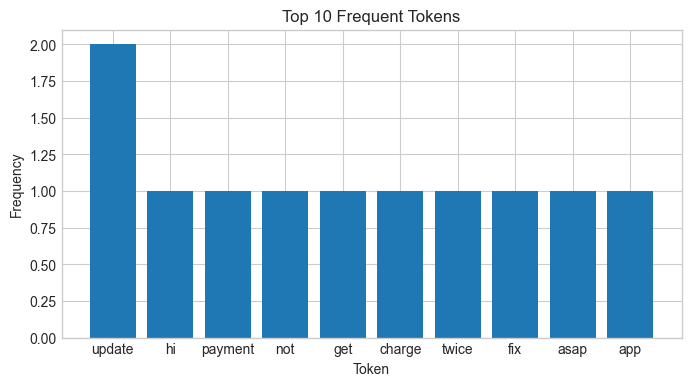

In [7]:
all_tokens = [t for sub in df['tokens'].tolist() for t in sub]
freq = Counter(all_tokens).most_common(10)

words = [x[0] for x in freq]
counts = [x[1] for x in freq]

plt.figure(figsize=(8,4))
plt.bar(words, counts)
plt.title('Top 10 Frequent Tokens')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.show()

## 6. Summary
- Cleaned raw chat/ticket text
- Removed punctuation, URLs, numbers, emails
- Tokenized using spaCy
- Removed stopwords
- Applied lemmatization
- Visualized top tokens
- Generated `processed_text` column for ML models

**Deliverable:** `day29_text_preprocessing.ipynb`